In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src.ALMApy import run_alma, change_param

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Serif"
})

In [3]:
G = 6.67e-11

R_earth = 6.371e6
M_earth = 5.972e24

rho_earth = M_earth/(4*np.pi/3*R_earth**3)
rigidity_earth = 1e11
viscosity_earth = 1e21
print(rho_earth)
g_earth = G*M_earth/R_earth**2


yr = 365.24*24*3600
kyrs = 1e3*yr

5513.258738589093


In [54]:
change_param("time_points_minus_one", 10)
t, k = run_alma(R_earth, rho_earth, rigidity_earth, viscosity_earth, "maxwell")
change_param("time_points_minus_one", 2)
t = np.array(t)*1000

Running ALMA3...
Done running!


In [35]:
def k_an(t):
    gamma2 = 19/2*rigidity_earth/(rho_earth*g_earth*R_earth)
    tau = viscosity_earth/rigidity_earth
    tau_prime = (1+gamma2)*tau
    return 3/2/(1+gamma2)*(1+gamma2*(1-np.exp(-t/tau_prime)))#3/2/(1+gamma2)*(1/tau-1/tau_prime)*np.exp(-t/tau_prime)

def k_an2(t, R, rho, rigidity, viscosity):
    g = G*4*np.pi/3*rho*R
    gamma2 = 19/2*rigidity/(rho*g*R)
    tau = viscosity/rigidity
    tau_prime = (1+gamma2)*tau
    return 3/2/(1+gamma2)*(1+gamma2*(1-np.exp(-t/tau_prime)))#3/2/(1+gamma2)*(1/tau-1/tau_prime)*np.exp(-t/tau_prime)

/tmp/ipykernel_801/3578088414.py:20: RuntimeWarning: divide by zero encountered in divide
  ax2 = ax.secondary_xaxis("top", (lambda x:2*np.pi/x, lambda x: 2*np.pi/x))


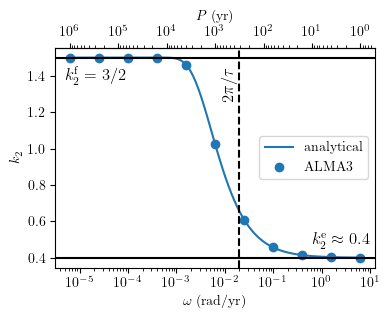

In [60]:
gamma2 = 19/2*rigidity_earth/(rho_earth*g_earth*R_earth)
tau = viscosity_earth/rigidity_earth
tau_prime = (1+gamma2)*tau

t_interp = np.logspace(0,6,100)

fig, ax = plt.subplots(figsize=(4,3.3))
ax.plot(2*np.pi/t_interp,k_an(t_interp*yr), label="analytical")
ax.scatter(2*np.pi/t,k,color="C0", label="ALMA3")

ax.axhline(3/2, color="black")
ax.text(5e-6, 1.45, "$k_2^\\mathrm{f}=3/2$", fontsize=12, color="black", verticalalignment="top", horizontalalignment="left")

ax.axvline(2*np.pi/(tau/yr), color="black", linestyle="dashed")
ax.text(2*np.pi/(tau/yr)*0.9, 1.25, r"$2\pi/\tau$", fontsize=12, rotation=90, verticalalignment="bottom", horizontalalignment="right")

ax.axhline(3/2/(1+gamma2), color="black")
ax.text(1e1, 0.45, "$k_2^\\mathrm{e}\\approx 0.4$", fontsize=12, color="black", verticalalignment="bottom", horizontalalignment="right")

ax2 = ax.secondary_xaxis("top", (lambda x:2*np.pi/x, lambda x: 2*np.pi/x))
ax2.set_xlabel(r"$P$ (yr)")

ax.set_xscale("log")
ax.set_xlabel(r"$\omega$ (rad/yr)")
ax.set_ylabel(r"$k_2$")
ax.legend()
fig.tight_layout()
fig.savefig("figures/report/k2_vs_omega.pdf")
plt.show()

/tmp/ipykernel_801/3078368701.py:10: RuntimeWarning: divide by zero encountered in divide
  ax2 = ax.secondary_xaxis("top", (lambda x:2*np.pi/(x), lambda x: 2*np.pi/(x)))


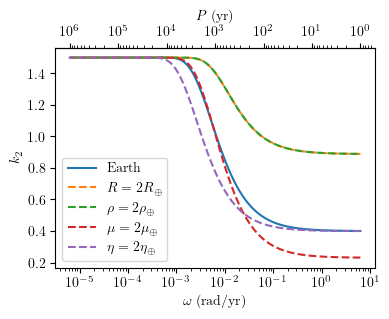

In [65]:
#t_interp = np.logspace(-3,3,100)*kyrs

fig, ax = plt.subplots(figsize=(4,3.3))
ax.plot(2*np.pi/t_interp,k_an(t_interp*yr), label="Earth")
ax.plot(2*np.pi/t_interp, k_an2(t_interp*yr, 2*R_earth, rho_earth, rigidity_earth, viscosity_earth), linestyle="--", label=r"$R=2R_\oplus$")
ax.plot(2*np.pi/t_interp[1:], k_an2(t_interp[1:]*yr, R_earth, 2*rho_earth, rigidity_earth, viscosity_earth), linestyle="--", label=r"$\rho=2\rho_\oplus$")
ax.plot(2*np.pi/t_interp, k_an2(t_interp*yr, R_earth, rho_earth, 2*rigidity_earth, viscosity_earth), linestyle="--", label=r"$\mu=2\mu_\oplus$")
ax.plot(2*np.pi/t_interp, k_an2(t_interp*yr, R_earth, rho_earth, rigidity_earth, 2*viscosity_earth), linestyle="--", label=r"$\eta=2\eta_\oplus$")

ax2 = ax.secondary_xaxis("top", (lambda x:2*np.pi/(x), lambda x: 2*np.pi/(x)))
ax2.set_xlabel(r"$P$ (yr)")

ax.set_xscale("log")
ax.set_xlabel(r"$\omega$ (rad/yr)")
ax.set_ylabel(r"$k_2$")
ax.legend()
fig.tight_layout()
fig.savefig("figures/report/k2_vs_omega_params.pdf")
plt.show()